In [1]:
import pandas as pd
import numpy as np
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from tqdm import tqdm
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
sys.path.append('/home/groups/dpwall/briannac/general_scripts/plotting')
from pvals_distribution_plots import PlotPvals
from joblib import Parallel, delayed
from statsmodels.graphics.gofplots import qqplot

In [2]:
import mlxtend

In [53]:
import pandas as pd
import numpy as np
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from tqdm import tqdm
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

from sklearn.feature_selection import f_regression
MICROBE_TYPE = 'bacteria' # Types of microbes.

BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'
MICROBE_FILE = BLOOD_MICROBIOME_DIR + 'data/%s_filtered.csv' % MICROBE_TYPE
BAM_MAPPINGS_FILE = BLOOD_MICROBIOME_DIR + 'data/bam_mappings.csv'
EXOG_DIR = BLOOD_MICROBIOME_DIR + 'intermediate_files/linear_regression/exog.csv'
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
bam_mappings['child'] = 1.0*(bam_mappings.relationship=='sibling')
bam_mappings['autism'] = 1.0*(bam_mappings.derived_affected_status=='autism')

df_microbe = pd.read_csv(BLOOD_MICROBIOME_DIR + 'data/virus_filtered.csv', index_col=0)

# Write to exog directory if not written (should be written after first run)
bam_mappings['sample_id'] = bam_mappings.index
exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][['bio_seq_source', 'sex_numeric', 'child', 'autism', 
                                                          'sequencing_plate', 'family', 'sample_id']], drop_first=False, dummy_na=True).astype(float)
exog = exog.drop(['bio_seq_source_LCL', 'sex_numeric_1.0'], axis=1)
exog = exog[exog.columns[exog.sum()!=0]]
exog_scale = pd.DataFrame(StandardScaler().fit(exog).transform(exog))
exog_scale.columns = exog.columns
exog_scale.index = exog.index
exog_scale.columns = [c.replace('.', '_').replace('-', '_') for c in exog_scale.columns]
exog = exog_scale

column = df_microbe.columns[3]
endog = np.log10(df_microbe[[column]]+1)
print(endog.columns[0])
endog = StandardScaler().fit(endog).transform(endog)

Torque teno virus


In [4]:
np.corrcoef([1,2,3], [2,3,1])[0,1]

-0.5

In [84]:
import copy
min_pval = 0
sig_cols = []
new_exog = exog
new_endog = endog
_, pvals = f_regression(new_exog, new_endog)
cols_left = exog.columns
ols_model = sm.OLS(endog, exog[[cols_left[np.argmin(pvals)]]]).fit()
new_endog = ols_model.resid
min_pval = old_model.f_pvalue
while min_pval < (.05):
    print('here')
    sig_cols = sig_cols + [cols_left[np.argmin(pvals)]]
    old_model = copy.deepcopy(ols_model)
    cols_left = [c for c in exog.columns if c not in sig_cols]
    _, pvals = f_regression(exog[cols_left], new_endog)
    new_exog = exog[sig_cols + [cols_left[np.argmin(pvals)]]]
    ols_model = sm.OLS(endog, new_exog).fit()
    new_endog = ols_model.resid
    min_pval = anova_lm(old_model, ols_model)['Pr(>F)'][1]    
a = [(column, i,j) for i,j in zip(sig_cols, ols_model.params) if 'sample_id' not in i]

/share/software/user/open/py-scikit-learn/0.19.1_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


here
here


/home/users/briannac/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


here
here


In [45]:
ols_model = sm.OLS(endog, 1+0*exog[exog.columns[[0]]]).fit()
ols_model

In [33]:
anova_lm(ols_model, ols_model)['Pr(>F)'][1]

/home/users/briannac/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


nan

In [6]:
import seaborn as sns
BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'

df_bacteria = pd.read_csv(BLOOD_MICROBIOME_DIR + 'data/bacteria_filtered.csv', index_col=0)
df_virus = pd.read_csv(BLOOD_MICROBIOME_DIR + 'data/virus_filtered.csv', index_col=0).loc[df_bacteria.index]
BAM_MAPPINGS_FILE = BLOOD_MICROBIOME_DIR + 'data/bam_mappings.csv'
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
bam_mappings['child'] = 1.0*(bam_mappings.relationship=='sibling')
bam_mappings['autism'] = 1.0*(bam_mappings.derived_affected_status=='autism')
bam_mappings = bam_mappings.loc[df_bacteria.index]
exog = pd.get_dummies(bam_mappings.loc[df_bacteria.index][['bio_seq_source', 'sex_numeric', 'child', 'autism', 
                                                          'sequencing_plate', 'family']], drop_first=False, dummy_na=True).astype(float)

In [116]:
%%bash 
cat /home/groups/dpwall/briannac/blood_microbiome/intermediate_files/linear_regression/virus*.txt > \
/home/groups/dpwall/briannac/blood_microbiome/results/lasso/f_regression_virus.csv

In [103]:
f_regression_results = pd.read_csv('/home/groups/dpwall/briannac/blood_microbiome/results/lasso/f_regression_virus.csv', header=None, index_col=0)
f_regression_results.columns = ['microbe', 'sig_variable', 'coeff']
f_regression_results = f_regression_results[[m in df_virus.columns[(df_virus>0).sum()>1] for m in f_regression_results.microbe]]
len(set(f_regression_results.microbe))

31

In [110]:
print(len(f_regression_results[['child' in f for f in f_regression_results['sig_variable']]]))
print(len(f_regression_results[['autism' in f for f in f_regression_results['sig_variable']]]))
print(len(f_regression_results[['sex' in f for f in f_regression_results['sig_variable']]]))
f_regression_results[['bio_seq_source' in f for f in f_regression_results['sig_variable']]]['microbe']

1
0
1


0
0      Human herpesvirus 4
16    Human herpesvirus 6B
4      Human herpesvirus 7
Name: microbe, dtype: object

In [115]:
f_regression_results[f_regression_results.microbe=='Human herpesvirus 4']

,microbe,sig_variable,coeff
0,,,
0,Human herpesvirus 4,bio_seq_source_WB,-0.512160
1,Human herpesvirus 4,sequencing_plate_MTR-00010,0.130682
2,Human herpesvirus 4,sequencing_plate_MTR-00018,0.100106
3,Human herpesvirus 4,sequencing_plate_MTR-00016,0.114078
4,Human herpesvirus 4,sequencing_plate_MTR-00015,0.098722
...,...,...,...
135,Human herpesvirus 4,family_AU1876,0.021436
136,Human herpesvirus 4,family_AU3347,-0.019804
137,Human herpesvirus 4,family_AU2636,-0.019804


In [113]:
Counter(f_regression_results[['family' in f for f in f_regression_results['sig_variable']]]['microbe'])

Counter({'Human adenovirus 5': 3,
         'Human betaherpesvirus 6A': 5,
         'Human herpesvirus 4': 114,
         'Human herpesvirus 6A': 4,
         'Human herpesvirus 6B': 24,
         'Human herpesvirus 7': 11,
         'Human parainfluenza virus': 2,
         'Human parvovirus B19': 2,
         'Lactococcus phage bIL170': 2,
         'Lactococcus phage bIL67': 2,
         'Lactococcus phage c2': 2,
         'Lactococcus phage jj50': 2,
         'Lactococcus phage P008': 1,
         'Lactococcus phage sk1': 5,
         'Molluscum contagiosum virus': 1,
         'Moloney murine leukemia': 2,
         'Propionibacterium phage PA6': 6,
         'Rhodococcus phage Whack': 1,
         'Squirrel monkey retrovirus': 4,
         'Streptococcus phage ALQ13.2': 6,
         'Streptococcus phage DT1': 1,
         'Streptococcus phage PH10': 2,
         'Torque teno virus.10': 1,
         'Torque teno virus.1': 2,
         'Torque teno virus.3': 2,
         'Torque teno virus.4': 3,
      

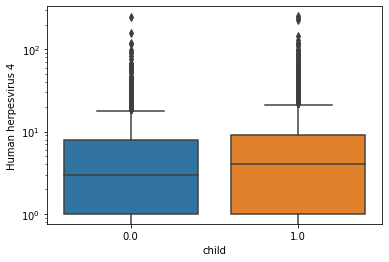

In [11]:
sns.boxplot(y=df_virus['Human herpesvirus 4'], x=exog['child'])
plt.yscale('log')
#plt.yscale('log')

In [12]:
print(len(f_regression_results[['sex' in f for f in f_regression_results['sig_variable']]]), 'linked to sex')
print(len(f_regression_results[['autism' in f for f in f_regression_results['sig_variable']]]), 'linked to asd')
f_regression_results[['bio_seq' in f for f in f_regression_results['sig_variable']]]

0 linked to sex
0 linked to asd


,microbe,sig_variable,coeff
0,,,
22,Enterobacteria phage lambda,bio_seq_source_WB,-0.177755
11,Glypta fumiferanae ichnovirus.1,bio_seq_source_WB,-0.119484
0,Human herpesvirus 4,bio_seq_source_WB,-0.522403
16,Human herpesvirus 6B,bio_seq_source_WB,0.131483
3,Torque teno virus.10,bio_seq_source_WB,-0.078405
4,Torque teno virus.6,bio_seq_source_WB,0.078399
4,Torque teno virus,bio_seq_source_WB,-0.128363


In [ ]:
ols_model = sm.OLS(endog, exog).fit()

In [ ]:
ols_model.

In [74]:
(df_virus['Torque teno virus.10']>0).sum()

4

<AxesSubplot:xlabel='bio_seq_source_WB', ylabel='Enterobacteria phage lambda'>

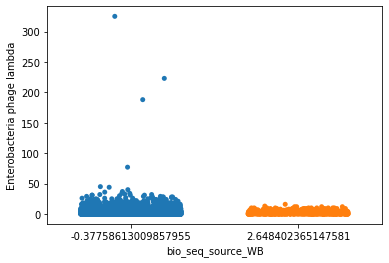

In [69]:
sns.stripplot(y=df_virus['Enterobacteria phage lambda'], x=exog['bio_seq_source_WB'], jitter=.3)
#plt.yscale('log')

In [23]:
Counter(exog['bio_seq_source_WB'])

Counter({0.0: 3998, 1.0: 570})

In [19]:
sum(df_virus['Torque teno virus.10']>0)

4

In [349]:
df_virus

,Squirrel monkey retrovirus,Human herpesvirus 6B,Encephalomyocarditis virus complete,Torque teno virus,Torque teno virus.1,Torque teno virus.3,Torque teno virus.4,Torque teno virus.5,Torque teno virus.6,Torque teno virus.7,...,Enterobacteria phage phiX174,Lactococcus phage jj50,Lactococcus phage 712,Human adenovirus type,Human adenovirus 5,Moloney murine leukemia,Lactococcus phage bIL67,Rhodococcus phage Whack,Torque teno midi.4,Human betaherpesvirus 6A
02C10540,0,0,1,0,0,0,0,0,0,0,...,661254,0,0,0,0,0,0,0,0,0
02C10541,0,0,2,0,0,0,0,0,0,0,...,681418,0,0,0,0,0,0,0,0,0
02C10542,0,0,3,0,0,0,0,0,0,0,...,312025,0,0,0,0,0,0,0,0,0
02C10543,0,0,3,0,0,0,0,0,0,0,...,746592,0,0,0,0,0,0,0,0,0
02C10702,0,0,2,0,0,0,0,0,0,0,...,494591,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MH0143008,0,0,3,0,0,0,0,0,0,0,...,71833,0,0,0,0,0,0,0,0,0
MH0143009,0,0,1,0,0,0,0,0,0,0,...,370448,0,0,0,0,0,0,0,0,0
MH0143013,0,1,6,31,1,0,0,0,0,3,...,182175,0,0,0,0,0,0,0,0,0
MH0143018,0,0,5,0,0,0,0,0,0,0,...,421293,0,0,0,0,0,0,0,0,0


In [348]:
exog['bio_seq_source_WB']

02C10540     0.0
02C10541     0.0
02C10542     0.0
02C10543     0.0
02C10702     0.0
            ... 
MH0143008    1.0
MH0143009    1.0
MH0143013    1.0
MH0143018    1.0
MH0143019    1.0
Name: bio_seq_source_WB, Length: 4568, dtype: float64

In [346]:
(df_virus['Torque teno virus.6']>0).sum()

2

In [330]:
len(set(f_regression_results[['family' in f for f in f_regression_results['sig_variable']]]['microbe']))

38

In [331]:
len(set(f_regression_results[['sequencing_plate' in f for f in f_regression_results['sig_variable']]]['microbe']))

37

In [198]:
endog = np.log10(df_microbe[[df_microbe.columns[286]]]+1)
print(endog.columns[0])
endog = StandardScaler().fit(endog).transform(endog)
min_pval = 0
sig_cols = []
new_exog = exog
new_endog = endog
_, pvals = f_regression(new_exog, new_endog)
min_pval = min(pvals)
cols_left = exog.columns
ols_model = sm.OLS(endog, 1+0*exog[exog.columns[[0]]]).fit()
new_endog = ols_model.resid
while min_pval < (.05/len(df_microbe.columns)/len([c for c in exog.columns if 'sample_id' not in c])):
    sig_cols = sig_cols + [cols_left[np.argmin(pvals)]]
    new_exog = exog[sig_cols]
    ols_model = sm.OLS(endog, new_exog).fit()
    new_endog = ols_model.resid
    cols_left = [c for c in exog.columns if c not in sig_cols]
    _, pvals = f_regression(exog[cols_left], new_endog)
    min_pval = min(pvals)
a = [(i,j) for i,j in zip(sig_cols, ols_model.params) if 'sample_id' not in i]

Gemmata obscuriglobus UQM


In [197]:
cutoff = (.05/len(df_microbe.columns)/len([c for c in exog.columns if 'sample_id' not in c]))

In [157]:
bam_mappings[bam_mappings['family']=='family_AU3369'].bio_seq_source

Series([], Name: bio_seq_source, dtype: object)

In [31]:
sig_cols = []
sig_cols = sig_cols + [cols_left[np.argsort(pvals)][0]]
new_exog = exog[sig_cols]
ols_model = sm.OLS(endog, new_exog).fit()
new_endog = ols_model.resid
cols_left = [c for c in exog.columns if c not in sig_cols]
_, pvals = f_regression(exog[cols_left], new_endog)

In [33]:
len(pvals)

1063

In [20]:
anova_results = pd.read_csv('/home/groups/dpwall/briannac/blood_microbiome/results/lasso/virus_pvals_linear_regression.csv', header=None)
anova_results.columns = ['feature', 'df', 'ss', 'mss', 'f', 'p', 'microbe']

In [33]:
anova_fams = anova_results[['family' in f for f in anova_results.feature]]
anova_fams[anova_fams.p<(.05/len(set(anova_fams.feature))/84)]

,feature,df,ss,mss,f,p,microbe
219,family_AU0800,1.0,0.075792,0.075792,39.979650,2.888081e-10,Lactococcus phage c2
550,family_AU1481,1.0,0.055673,0.055673,29.366870,6.391235e-08,Lactococcus phage c2
703,family_AU1781,1.0,0.054624,0.054624,28.813887,8.482618e-08,Lactococcus phage c2
752,family_AU1886,1.0,0.072913,0.072913,38.460888,6.233157e-10,Lactococcus phage c2
854,family_AU2178,1.0,0.063834,0.063834,33.671808,7.100207e-09,Lactococcus phage c2
890,family_AU2456,1.0,0.112018,0.112018,59.088839,1.941538e-14,Lactococcus phage c2
897,family_AU2497,1.0,0.479607,0.479607,252.989365,4.577740e-55,Lactococcus phage c2
903,family_AU2582,1.0,0.101599,0.101599,53.592658,3.040978e-13,Lactococcus phage c2


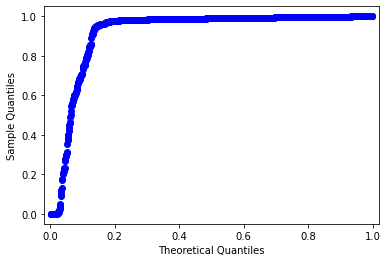

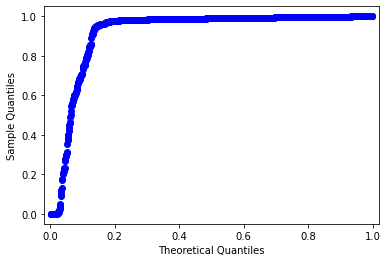

In [29]:
qqplot(anova_results[['family' in f for f in anova_results.feature]].p.values, dist=stats.uniform)

In [8]:
num_cores

16

In [641]:
bam_mappings['sample_id'] = bam_mappings.index
bam_mappings['asd'] = bam_mappings['derived_affected_status']=='autism'
exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][[
    'sequencing_plate', 'bio_seq_source', 'sex_numeric', 'asd', 'relationship', 'family']], drop_first=False).astype(float)
exog_scaled = pd.DataFrame(StandardScaler().fit(exog).transform(exog))
exog_scaled.columns = exog.columns
exog_scaled.index = exog.index
#exog['derived_affected_status_autism'] = exog['derived_affected_status_autism'] + exog['derived_affected_status_asd']
#exog['relationship_parent'] = 1-exog['relationship_sibling']
#exog = exog.drop(['derived_affected_status_broad-spectrum', 'derived_affected_status_not-met', 'derived_affected_status_nqa','derived_affected_status_asd','relationship_mother', 'relationship_father'], axis=1) #, 'sex_numeric_1.0', 'bio_seq_source_LCL'], axis=1)
#exog['derived_affected_status_nt'] = ((exog['relationship_sibling']==1) & (exog['derived_affected_status_autism']==0))*1.0
COLUMN = df_microbe.columns[5]
print(COLUMN)
print('Cross-validation for alpha...')
endog = np.log10(df_microbe[COLUMN]+1)
lm = linear_model.LassoCV(positive=True, fit_intercept=True, cv=20)
lm.fit(exog_scaled, endog)
alpha = lm.alpha_

#new_idx = [np.random.randint(0,len(exog)) for i in endog]
c = []
for i in range(20):
    np.random.seed(i)
    idx = np.where(pd.isnull(bam_mappings),bam_mappings,bam_mappings.astype(str))
    sample_df = bam_mappings.loc[df_microbe.index][['sequencing_plate', 'bio_seq_source', 'sex_numeric', 
         'asd', 'relationship', 'family', 'sample_id']].groupby(
        ['sequencing_plate', 'bio_seq_source', 'sex_numeric', 
         'asd', 'relationship', 'family']).aggregate(lambda x: list(np.random.choice(list(x), len(list(x)), replace=True)))
    samples = np.concatenate(sample_df.reindex()['sample_id'])
    #samples = np.random.choice(df_microbe.index, len(df_microbe), replace=True)
    exog_new = exog_scaled.loc[samples]
    endog_new = endog[samples]
    lm = linear_model.Lasso(positive=True, fit_intercept=True, alpha=alpha)
    lm.fit(exog_new, endog_new)
    c = c + [exog.columns[lm.coef_>0]]


Human herpesvirus 6B
Cross-validation for alpha...


<AxesSubplot:xlabel='sequencing_plate_MTR-01003', ylabel='Human herpesvirus 6B'>

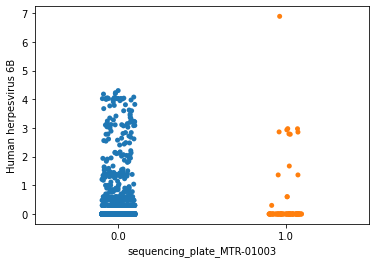

In [637]:
sns.stripplot(y=endog, x=exog['sequencing_plate_MTR-01003'])

In [548]:
idx = np.where(pd.isnull(bam_mappings),bam_mappings,bam_mappings.astype(str))
bam_mappings['sample_id'] = bam_mappings.index
bam_mappings['asd'] = bam_mappings['derived_affected_status']=='autism'
sample_df = bam_mappings.loc[df_microbe.index][['sequencing_plate', 'bio_seq_source', 'sex_numeric', 
     'asd', 'relationship', 'family', 'sample_id']].groupby(
    ['sequencing_plate', 'bio_seq_source', 'sex_numeric', 
     'asd', 'relationship']).aggregate(lambda x: list(np.random.choice(list(x), len(list(x)), replace=True)))
samples = np.concatenate(sample_df.reindex()['sample_id'])

In [431]:
len(np.concatenate(sample_df.reset_index()['sample_id']))

2167

In [426]:
len(np.concatenate(sample_df['sample_id'].values))

2167

In [ ]:
sample_df

In [375]:
samples = [a[-1] for a in sample_df.index]
len(samples)

2167

In [332]:
Counter([tuple(i[1].values) for i in bam_mappings.loc[df_microbe.index][
    ['sequencing_plate', 'bio_seq_source', 'sex_numeric', 'derived_affected_status', 'relationship']].iterrows()]).most_common(4)

[(('MTR-01011', 'LCL', '1.0', 'autism', 'sibling'), 43),
 (('MTR-01009', 'LCL', '1.0', 'autism', 'sibling'), 42),
 (('MTR-01012', 'LCL', '1.0', 'autism', 'sibling'), 42),
 (('MTR-01019', 'LCL', '1.0', 'autism', 'sibling'), 42)]

In [ ]:
N_BOOTS = 10
exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][['sequencing_plate', 'bio_seq_source', 'sex_numeric', 'derived_affected_status', 'relationship']], drop_first=False).astype(float)
exog['derived_affected_status_autism'] = exog['derived_affected_status_autism'] + exog['derived_affected_status_asd']
exog['relationship_parent'] = 1-exog['relationship_sibling']
exog = exog.drop(['derived_affected_status_broad-spectrum', 'derived_affected_status_not-met', 'derived_affected_status_nqa','derived_affected_status_asd','relationship_mother', 'relationship_father'], axis=1) #, 'sex_numeric_1.0', 'bio_seq_source_LCL'], axis=1)
exog['derived_affected_status_nt'] = ((exog['relationship_sibling']==1) & (exog['derived_affected_status_autism']==0))*1.0
    
print('Cross-validation for alpha...')
np.random.seed(np.cumsum([ord(i) for i in COLUMN])[-1])
endog = np.log(df_microbe[COLUMN]+1)
lm = linear_model.LassoCV(positive=True, fit_intercept=True, cv=10)
lm.fit(exog, endog)
alpha = lm.alpha_

def ComputeCoefficients(i):
    np.random.seed(i)
    new_idx = [np.random.randint(0,len(exog)) for i in endog]
    exog_new = exog.iloc[new_idx]
    endog_new = endog[new_idx]
    lm = linear_model.Lasso(positive=True, fit_intercept=True, alpha=alpha)
    lm.fit(exog_new, endog_new)
    return lm.coef_


print('running bootstrap')
inputs = tqdm([i for i in range(N_BOOTS)])
coeffs = Parallel(n_jobs=num_cores)(delayed(ComputeCoefficients)(i) for i in inputs)
print('Computing p values...')
pvals = [sum([c[i]==0 for c in coeffs])/N_BOOTS for i in range(len(coeffs[0]))]
print('Writing to file...')
with open(COEFF_OUT_DIR, 'w') as f:
    f.write(','.join([COLUMN] + [str(p) for p in list(pvals)]) + '\n')

In [ ]:
endog = np.log10(df_microbe[[column]]+1)
endog.columns = ['microbe']
exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][['bio_seq_source', 'sequencing_plate', 'sex_numeric', 'child', 'autism', 'family']], drop_first=False, dummy_na=True).astype(float)
exog = exog[exog.columns[exog.sum()!=0]]
exog_scale = pd.DataFrame(StandardScaler().fit(exog).transform(exog))
exog_scale.columns = exog.columns
exog_scale.index = exog.index
exog_scale.columns = [c.replace('.', '_').replace('-', '_') for c in exog_scale.columns]
formula = 'microbe ~ ' + ' + '.join(exog_scale.columns)
def GetFStats(column):
    endog = np.log10(df_microbe[[column]]+1)
    endog.columns = ['microbe']
    model = ols(data=endog.join(exog_scale), formula=formula).fit()
    anova_results = anova_lm(model)
    anova_results = anova_results['PR(>F)'][:-1]
    return[(i,j) for i,j in zip(anova_results.index, anova_results.values)]

inputs = tqdm(df_microbe[:10])
pvals = Parallel(n_jobs=num_cores)(delayed(GetFStats)(i) for i in inputs)

In [111]:
import sys
sys.path.append('/home/groups/dpwall/briannac/general_scripts/plotting')
from pvals_distribution_plots import PlotPvals


In [352]:
from joblib import Parallel, delayed
import glob 
import multiprocessing
import pandas as pd
import statsmodels.api as sm
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

num_cores = multiprocessing.cpu_count()

COLUMN = 'Fuscobacterium ulcerans' #sys.argv[1] # Bacteria or virus name.
MICROBE_TYPE = 'virus' #sys.argv[3] # Types of microbes.

print(COLUMN)

BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'
MICROBE_FILE = BLOOD_MICROBIOME_DIR + 'data/%s_filtered.csv' % MICROBE_TYPE
BAM_MAPPINGS_FILE = BLOOD_MICROBIOME_DIR + 'data/bam_mappings.csv'

bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
df_microbe = pd.read_csv(MICROBE_FILE, index_col=0)


exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][['sequencing_plate', 'bio_seq_source', 'sex_numeric', 'derived_affected_status', 'relationship']], drop_first=False).astype(float)
exog['derived_affected_status_autism'] = exog['derived_affected_status_autism'] + exog['derived_affected_status_asd']
exog = exog.drop(
    ['derived_affected_status_broad-spectrum', 'derived_affected_status_not-met', 'derived_affected_status_nqa', 'derived_affected_status_asd',
     'relationship_mother', 'relationship_father', 'sex_numeric_1.0', 'bio_seq_source_LCL'], axis=1)
exog['derived_affected_status_autism'] = exog['derived_affected_status_autism'] + ((exog['relationship_sibling']==1) & (exog['derived_affected_status_autism']==0))*-1.0
exog['random'] = [np.random.random() for i in range(len(exog))]
exog_new = sm.add_constant(exog)
def GetPvals(column):
    endog = np.log(df_microbe[column]+1)
    mod = sm.OLS(endog, exog_new, hasconst=True)
    res = mod.fit()
    return [(column,i,j,k) for i,j,k in zip(exog.columns, res.pvalues[1:], res.params)]

inputs = tqdm([i for i in df_microbe.columns])
pvals = Parallel(n_jobs=num_cores)(delayed(GetPvals)(i) for i in inputs)


  0%|          | 0/84 [00:00<?, ?it/s]

Fuscobacterium ulcerans



100%|██████████| 84/84 [00:00<00:00, 92.98it/s]


In [374]:
def correction(variable):
    if 'family' in variable:
        return len(np.unique(bam_mappings.loc[df_microbe.index].family))*len(df_microbe.columns)
    elif 'sequencing_plate' in variable:
        return len(np.unique(bam_mappings.loc[df_microbe.index].sequencing_plate))*len(df_microbe.columns)
    else:
        return len(df_microbe.columns)
    
fam_cutoff = .05/len(np.unique(bam_mappings.loc[df_microbe.index].family))/len(df_microbe.columns)
seq_plate_cutoff = .05/len(np.unique(bam_mappings.loc[df_microbe.index].sequencing_plate))/len(df_microbe.columns)
other_cutoff = .05/len(df_microbe.columns)

pvals_concat = [(p[0],p[1],p[2],p[3]) for pval in pvals for p in pval]
fam_hits = [p for p in pvals_concat if ((float(p[2])<fam_cutoff) & ('family' in p[1]))]
seq_plate_hits = [p for p in pvals_concat if ((float(p[2])<seq_plate_cutoff) & ('sequencing_plate' in p[1]))]
sex_hits = [p for p in pvals_concat if ((float(p[2])<other_cutoff) & ('sex' in p[1]))]
asd_hits = [p for p in pvals_concat if ((float(p[2])<other_cutoff) & ('autism' in p[1]))]
relationship_hits = [p for p in pvals_concat if ((float(p[2])<other_cutoff) & ('relationship' in p[1]))]
bio_seq_source_hits = [p for p in pvals_concat if ((float(p[2])<other_cutoff) & ('bio_seq_source' in p[1]))]


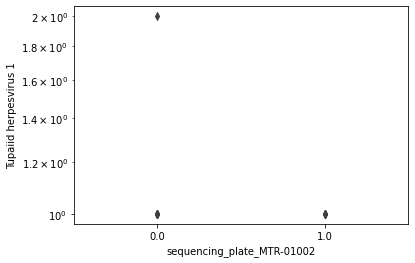

In [385]:
sns.boxplot(y=df_microbe['Tupaiid herpesvirus 1'], x=exog['sequencing_plate_MTR-01002'])
plt.yscale('log')

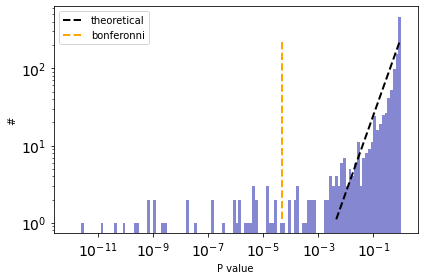

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


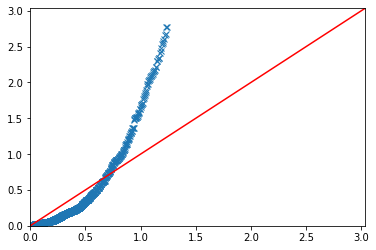

In [351]:
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import probplot
from statsmodels.graphics.gofplots import qqplot
pvals_to_plot = (np.array(sorted([float(p[2]) for p in pvals_concat if 'sequencing_plate' in p[1]])))
PlotPvals(pvals_to_plot)
plt.show()
exp = -np.log10(np.linspace(0,1,len(pvals_to_plot)))
plt.plot(exp, -np.log10(sorted(pvals_to_plot)), 'x')
plt.plot(exp, exp, 'r-')
plt.ylim(0, np.max(exp[1:]))
plt.xlim(0, np.max(exp[1:]))
plt.show()

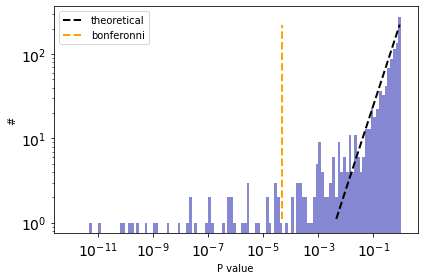

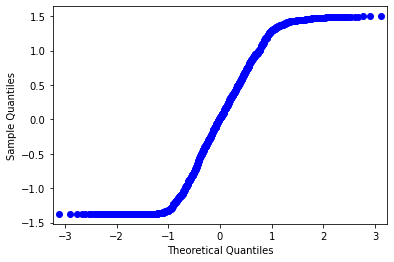

In [259]:
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import probplot
from statsmodels.graphics.gofplots import qqplot
pvals_to_plot = (np.array(sorted([float(p[2]) for p in pvals_concat if 'sequencing_plate' in p[1]])))
PlotPvals(pvals_to_plot)
plt.plot(sorted(pvals_to_plot), np.linspace(0,1,len(pvals_to_plot), 'o'))plt.show()

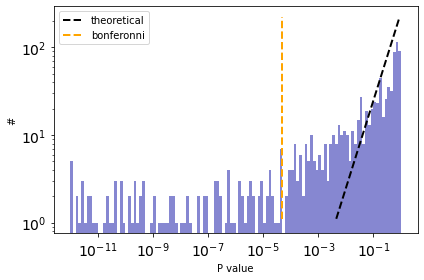

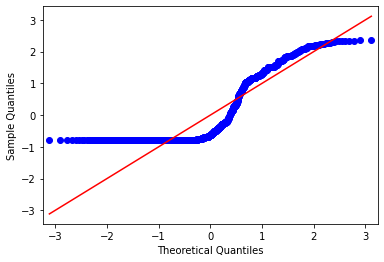

In [248]:
from statsmodels.graphics.gofplots import ProbPlot
_,pvals_to_plot = fdrcorrection(np.array(sorted([float(p[2]) for p in pvals_concat if 'sequencing_plate' in p[1]])),method='indep')
PlotPvals(pvals_to_plot)
qqplot(pvals_to_plot, fit=True, line='s')
plt.show()

In [785]:
exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][['sequencing_plate', 'bio_seq_source', 'sex_numeric', 'derived_affected_status', 'relationship']], drop_first=False, dummy_na=True).astype(float)
np.shape(exog)
exog.columns[exog.sum()==0]

Index(['sequencing_plate_nan', 'bio_seq_source_nan', 'sex_numeric_nan',
       'relationship_nan'],
      dtype='object')

In [784]:
exog = exog[exog.columns[exog.sum()!=0]]
np.shape(exog)

(4568, 67)

# Linear regression

In [11]:
min(pvals)

33

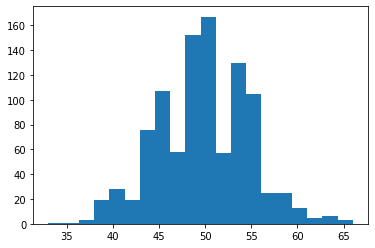

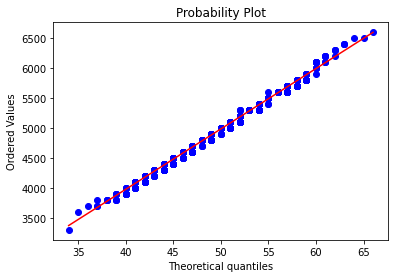

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


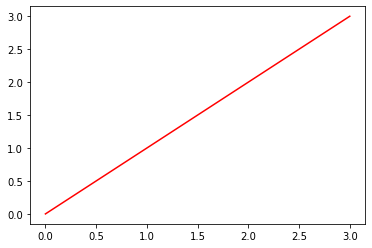

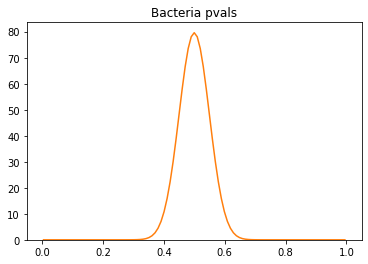

In [8]:
pvals_df = pd.read_csv(virus_pvals_file)
pvals_df = pvals_df[[c for c in pvals_df.columns if '_' in c]]
pvals = np.concatenate(pvals_df.values)
pvals = [np.random.binomial(100,.5) for i in range(1000)]
plt.hist(pvals, bins=20)
plt.show()
pvals=np.array(sorted(pvals))
stats.probplot(100*pvals, plot=plt,dist=stats.binom(100, .5))
plt.show()


pvals_transformed = [2*min(stats.binom.cdf(100*p, n=100, p=.5),stats.binom.sf(100*p, n=100, p=.5))  for p in pvals]
pvals_transformed = np.array(pvals_transformed)
exp = np.linspace(0,1,len(pvals_transformed))
plt.plot(-np.log10(exp), -np.log10(sorted(pvals_transformed)), 'x')
plt.plot(-np.log10(exp), -np.log10(exp), '-r')
plt.show()


nn = plt.hist(pvals, bins=np.linspace(0,1,102), alpha=.5)
exp = np.array([len(pvals)*stats.binom.cdf(100*n,n=100,p=.5) for n in nn[1]])
exp = exp[1:]-exp[:-1]
plt.plot((nn[1][1:]+nn[1][:-1])/2, exp)
plt.title('Bacteria pvals')
plt.show()

In [ ]:
r, c = np.where(pvals_df>.7)

In [45]:
r, c = np.where(pvals_df>.7)
hits = [(pvals_df.index[i],pvals_df.columns[j]) for i,j in zip(r,c)]
seq_plate_hits = [h for h in hits if 'sequencing_plate' in h[1]]
sex_hits = [h for h in hits if 'sex_numeric' in h[1]]
asd_hits = [h for h in hits if 'derived_affected_status' in h[1]]
bio_source_hits = [h for h in hits if 'bio_seq_source' in h[1]]
relationship_hits = [h for h in hits if 'relationship' in h[1]]
for label, hh in [('seq_plate', seq_plate_hits),
                  ('sex_hits', sex_hits),
                  ('asd_hits', asd_hits),
                  ('bio_source_hits', bio_source_hits),
                  ('relationship_hits', relationship_hits)]:
    print(label, len(Counter([h[0] for h in hh])), len(hh)) #,len(hh), len(set([h[0] for h in hh])))

seq_plate 0 0
sex_hits 0 0
asd_hits 45 83
bio_source_hits 0 0
relationship_hits 1 3


In [47]:
relationship_hits

[('Moloney murine leukemia', 'relationship_father'),
 ('Moloney murine leukemia', 'relationship_mother'),
 ('Moloney murine leukemia', 'relationship_sibling')]

In [27]:
bio_source_hits

[('Human adenovirus type', 'bio_seq_source_LCL'),
 ('Human adenovirus type', 'bio_seq_source_WB')]

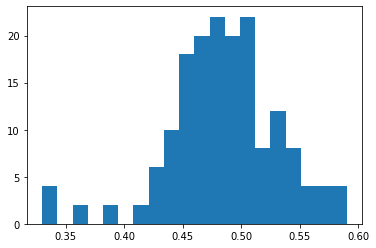

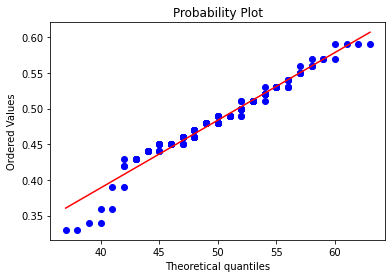

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


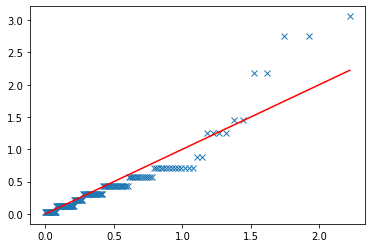

In [1029]:
pvals_df = pd.read_csv(virus_pvals_file)
pvals_df = pvals_df[[c for c in pvals_df.columns if 'bio_seq_source' in c]]
pvals = np.concatenate(pvals_df.values)
plt.hist(pvals, bins=20)
plt.show()
pvals=np.array(sorted(pvals))
stats.probplot(pvals, plot=plt,dist=stats.binom(100, .5))
plt.show()


pvals_transformed = [2*min(stats.binom.cdf(100*p, n=100, p=.5),stats.binom.sf(100*p, n=100, p=.5))  for p in pvals]
exp = np.linspace(0,1,len(pvals_transformed))
plt.plot(-np.log10(exp), -np.log10(sorted(pvals_transformed)), 'x')
plt.plot(-np.log10(exp), -np.log10(exp), '-r')
plt.show()

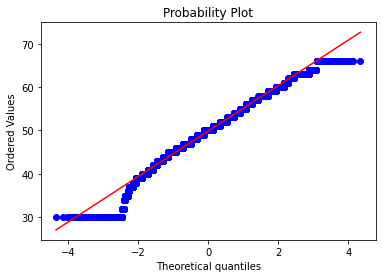

In [1017]:
stats.probplot(100*pvals, plot=plt)#,dist=stats.binom(100, .5))
plt.show()

In [1025]:
pvals = np.array(pvals)
pvals[pvals<stats.binom(100,.5).ppf(.05/len(pvals))]

array([30, 30, 30, 30, 30, 30, 30])

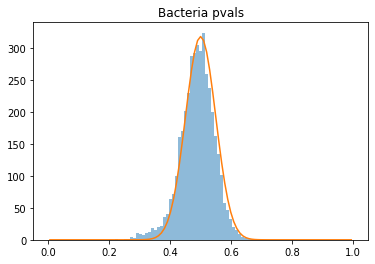

In [20]:
nn = plt.hist(pvals, bins=np.linspace(0,1,102), alpha=.5)
exp = np.array([len(pvals)*stats.binom.cdf(100*n,n=100,p=.5) for n in nn[1]])
exp = exp[1:]-exp[:-1]
plt.plot((nn[1][1:]+nn[1][:-1])/2, exp)
plt.title('Bacteria pvals')
plt.show()

In [8]:
[1,3,3,None,10]

[1, 3, 3, None, 10]

In [21]:
## Virus
print('VIRUS')
r, c = np.where((virus_pvals<(.05/(len(virus_pvals)))) | (virus_pvals>(1-.05/(len(virus_pvals)))))
hits = [(virus_pvals.index[i],virus_pvals.columns[j]) for i,j in zip(r,c)]
seq_plate_hits = [h for h in hits if 'sequencing_plate' in h[1]]
sex_hits = [h for h in hits if 'sex_numeric' in h[1]]
asd_hits = [h for h in hits if 'derived_affected_status' in h[1]]
bio_source_hits = [h for h in hits if 'bio_seq_source' in h[1]]
relationship_hits = [h for h in hits if 'relationship' in h[1]]
for label, hh in [('seq_plate', seq_plate_hits),
                  ('sex_hits', sex_hits),
                  ('asd_hits', asd_hits),
                  ('bio_source_hits', bio_source_hits),
                  ('relationship_hits', relationship_hits)]:
    print(label, len(Counter([h[0] for h in hh])), len(hh)) #,len(hh), len(set([h[0] for h in hh])))

VIRUS
seq_plate 0 0
sex_hits 10 10
asd_hits 0 0
bio_source_hits 8 8
relationship_hits 0 0


In [32]:
## bacteria
print('bacteria')
r, c = np.where((bacteria_pvals<(.05/(len(bacteria_pvals)))) | (bacteria_pvals>(1-.05/(len(bacteria_pvals)))))
hits = [(bacteria_pvals.index[i],bacteria_pvals.columns[j], bacteria_pvals.loc[bacteria_pvals.index[i]][bacteria_pvals.columns[j]]) for i,j in zip(r,c)]
seq_plate_hits = [h for h in hits if 'sequencing_plate' in h[1]]
sex_hits = [h for h in hits if 'sex_numeric' in h[1]]
asd_hits = [h for h in hits if 'derived_affected_status' in h[1]]
bio_source_hits = [h for h in hits if 'bio_seq_source' in h[1]]
relationship_hits = [h for h in hits if 'relationship' in h[1]]
for label, hh in [('seq_plate', seq_plate_hits),
                  ('sex_hits', sex_hits),
                  ('asd_hits', asd_hits),
                  ('bio_source_hits', bio_source_hits),
                  ('relationship_hits', relationship_hits)]:
    print(label, len(Counter([h[0] for h in hh])), len(hh)) #,len(hh), len(set([h[0] for h in hh])))

bacteria
seq_plate 0 0
sex_hits 18 18
asd_hits 0 0
bio_source_hits 149 149
relationship_hits 0 0


In [5]:

BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'
MICROBE_FILE = BLOOD_MICROBIOME_DIR + 'data/%s_filtered.csv' % 'bacteria'
BAM_MAPPINGS_FILE = BLOOD_MICROBIOME_DIR + 'data/bam_mappings.csv'

bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
df_microbe = pd.read_csv(MICROBE_FILE, index_col=0)
bam_mappings['sample_id'] = bam_mappings.index
bam_mappings = bam_mappings.loc[df_microbe.index]

In [6]:
pairwise_dists = pairwise_distances(df_microbe, metric='braycurtis')

In [216]:
df_microbe.columns[np.argsort(df_microbe.apply(np.median))][::-1]

Index(['Fusobacterium ulcerans', 'Mycobacterium tuberculosis',
       'Cyanothece CCY0110', 'Gemmata obscuriglobus UQM',
       'Mollicutes bacterium D7', 'Podospora anserina S', 'Burkholderia ',
       'Leishmania infantum JPCM5', 'Candidate division TM7',
       'Leishmania major strain',
       ...
       'Neisseria cinerea', 'Neisseria elongataglycolytica',
       'Neisseria flavescens NRL30031/H210', 'Neisseria flavescens SK114',
       'Neisseria gonorrhoeae NCCP11945', 'Neisseria lactamica',
       'Neisseria meningitidis', 'Neisseria meningitidis MC58',
       'Neisseria mucosa', 'Abiotrophia defectiva'],
      dtype='object', length=588)

In [3]:
import pandas as pd
import sys
import numpy as np
from tqdm import tqdm
from sklearn import linear_model
import multiprocessing
from joblib import Parallel, delayed
import glob 

num_cores = multiprocessing.cpu_count()

COLUMN = "Ralstonia pickettii 12J" #sys.argv[1] # Bacteria or virus name.
N_BOOTS = 20 #int(sys.argv[2]) # Number of bootstraps to run.
MICROBE_TYPE = 'bacteria' #sys.argv[3] # Types of microbes.

print(COLUMN)

BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'
MICROBE_FILE = BLOOD_MICROBIOME_DIR + 'data/%s_filtered.csv' % MICROBE_TYPE
BAM_MAPPINGS_FILE = BLOOD_MICROBIOME_DIR + 'data/bam_mappings.csv'

bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
df_microbe = pd.read_csv(MICROBE_FILE, index_col=0)
bam_mappings['sample_id'] = bam_mappings.index
bam_mappings = bam_mappings.loc[df_microbe.index]

Ralstonia pickettii 12J


In [1124]:
column = df_microbe.columns[33]
column

'Streptococcus phage Abc2'

In [164]:
column = 'Human herpesvirus 7'
all_columns = ['sex_numeric', 'bio_seq_source', 'sequencing_plate', 'relationship', 'derived_affected_status', 'family']
drop_col = 'family'

reduced_cols = ['sex_numeric']#[c for c in all_columns if c!=drop_col]
all_cols = ['sex_numeric', 'bio_seq_source'] #reduced_cols + [drop_col]

endog = np.log10(df_microbe[[column]] + 1)
endog = StandardScaler().fit(endog).transform(endog)
# All Model
exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][all_cols], drop_first=True, dummy_na=False).astype(float)
exog = exog[exog.columns[exog.sum()!=0]]
#exog = StandardScaler().fit(exog).transform(exog)
exog = sm.add_constant(exog)
mod = sm.OLS(endog, exog, hasconst=True)
res_all = mod.fit()

In [175]:
# reduced
exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][reduced_cols], drop_first=True, dummy_na=False).astype(float)
exog = exog[exog.columns[exog.sum()!=0]]
#exog = StandardScaler().fit(exog).transform(exog)
exog = sm.add_constant(exog)
mod1 = sm.OLS(endog, exog, hasconst=True)
res_reduced = mod1.fit()

anova_results = anova_lm(res_reduced, res_all)
anova_results

/home/users/briannac/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,4514.0,4466.793157,0.0,NaN,NaN,NaN
1,4567.0,4567.907703,-53.0,-101.114546,1.907443,NaN


In [224]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import multiprocessing
from joblib import Parallel, delayed
import glob 
from tqdm import tqdm
num_cores = multiprocessing.cpu_count()

BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'
MICROBE_FILE = BLOOD_MICROBIOME_DIR + 'data/%s_filtered.csv' % 'virus'
df_microbe = pd.read_csv(MICROBE_FILE, index_col=0)

BAM_MAPPINGS_FILE = BLOOD_MICROBIOME_DIR + 'data/bam_mappings.csv'
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)

pvals = []
bam_mappings['child'] = 1.0*(bam_mappings.relationship=='sibling')
bam_mappings['autism'] = 1.0*(bam_mappings.derived_affected_status=='autism')

def ANOVA_Pvals(column):
    endog = np.log10(df_microbe[[column]]+1)
    endog.columns = ['microbe']
    data = endog.join(bam_mappings.loc[df_microbe.index])
    not_done=True
    formula = 'microbe ~  C(bio_seq_source) + C(sequencing_plate) + C(sex_numeric) + C(child) + C(autism) + C(family)'
    while not_done:
        try: moore_lm = ols(formula,data=data).fit()
        except: 
            formula = formula = 'microbe ~ ' + ' + '.join(sig_predictors[::-1])
            moore_lm = ols(formula,data=data).fit()
        anova_results = sm.stats.anova_lm(moore_lm, typ=2)
        if np.mean(anova_results['PR(>F)'][:-1]<(.05/len(df_microbe)/4))==1.0:
            not_done=False
            return (column, anova_results)
        else:
            if len(anova_results)==2: return (column, [])
            sig_predictors = list(anova_results.index[np.argsort(anova_results['PR(>F)'])])[:-2]
            formula = 'microbe ~ ' + ' + '.join(sig_predictors)
            
def ANOVA_Pvals_dummy(column):
    endog = np.log10(df_microbe[[column]]+1)
    endog.columns = ['microbe']
    exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][all_cols], drop_first=True, dummy_na=True).astype(float)
    exog = exog[exog.columns[exog.sum()!=0]]
    exog_scale = pd.DataFrame(StandardScaler().fit(exog).transform(exog))
    exog_scale.columns = exog.columns
    exog_scale.index = exog.index
    exog_scale = sm.add_constant(exog_scale)
    
    
    data = endog.join(bam_mappings.loc[df_microbe.index])
    not_done=True
    formula = 'microbe ~  C(bio_seq_source) + C(sequencing_plate) + C(sex_numeric) + C(child) + C(autism) + C(family)'
    while not_done:
        try: moore_lm = ols(formula,data=data).fit()
        except: 
            formula = formula = 'microbe ~ ' + ' + '.join(sig_predictors[::-1])
            moore_lm = ols(formula,data=data).fit()
        anova_results = sm.stats.anova_lm(moore_lm, typ=2)
        if np.mean(anova_results['PR(>F)'][:-1]<(.05/len(df_microbe)/4))==1.0:
            not_done=False
            return (column, anova_results)
        else:
            if len(anova_results)==2: return (column, [])
            sig_predictors = list(anova_results.index[np.argsort(anova_results['PR(>F)'])])[:-2]
            formula = 'microbe ~ ' + ' + '.join(sig_predictors)

In [360]:
for column in df_microbe.columns:
endog = np.log10(df_microbe[[column]]+1)
endog.columns = ['microbe']
exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][['bio_seq_source', 'sequencing_plate', 'sex_numeric', 'child', 'autism', 'family']], drop_first=False, dummy_na=True).astype(float)
exog = exog[exog.columns[exog.sum()!=0]]
exog_scale = pd.DataFrame(StandardScaler().fit(exog).transform(exog))
exog_scale.columns = exog.columns
exog_scale.index = exog.index
exog_scale.columns = [c.replace('.', '_').replace('-', '_') for c in exog_scale.columns]
formula = 'microbe ~ ' + ' + '.join(exog_scale.columns)
model = ols(data=endog.join(exog_scale), formula=formula).fit()
anova_results = anova_lm(model)
anova_results = anova_results['PR(>F)'][:-1]
pvals = pvals + [(i,j) for i,j in zip(anova_results.index, anova_results.values)]

(array([116.,  81.,  77.,  83.,  72.,  90.,  63.,  88.,  90., 304.]),
 array([1.01775811e-09, 1.00000001e-01, 2.00000001e-01, 3.00000001e-01,
        4.00000001e-01, 5.00000001e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

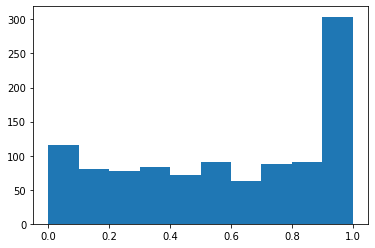

In [348]:
plt.hist(anova_results.values)

In [361]:
pvals = [(i,j) for i,j in zip(anova_results.index, anova_results.values)]

(array([22.,  7.,  2.,  6.,  4.,  3.,  4.,  1.,  3.,  2.]),
 array([0.0024404 , 0.10214143, 0.20184246, 0.30154349, 0.40124453,
        0.50094556, 0.60064659, 0.70034762, 0.80004865, 0.89974969,
        0.99945072]),
 <BarContainer object of 10 artists>)

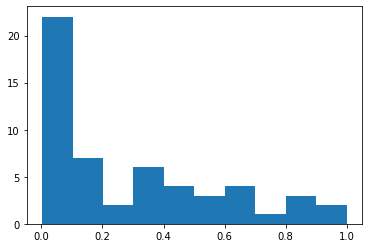

In [362]:
plt.hist([p[1] for p in vals if 'sequencing' in p[0]])

In [271]:
model = ols(data=endog.join(exog_scale), formula=formula).fit()


In [320]:
new_samples = anova_results.sort_values('PR(>F)', ascending=False).index[1:-1]
new_samples

Index(['family_AU4105', 'family_AU3684', 'family_AU1796', 'family_AU1423',
       'family_AU0201', 'family_AU0132', 'family_AU1916', 'family_AU1553',
       'family_AU0325', 'family_AU0980',
       ...
       'family_AU1054', 'family_AU1940', 'family_AU1824', 'family_AU1181',
       'family_AU2038', 'family_AU1414', 'family_AU3858', 'family_AU0208',
       'family_AU1500', 'family_AU0598'],
      dtype='object', length=1059)

In [274]:
anova_results = anova_lm(model)

In [315]:
while np.sum(anova_results['PR(>F)'][:-1]>(.05/len(df_microbe)))>0:
    new_samples = anova_results.sort_values('PR(>F)', ascending=False).index[1:0]

KeyboardInterrupt: 

In [314]:
anova_results.sort_values('PR(>F)', ascending=False).index

Index(['family_AU4138', 'family_AU4105', 'family_AU3684', 'family_AU1796',
       'family_AU1423', 'family_AU0201', 'family_AU0132', 'family_AU1916',
       'family_AU1553', 'family_AU0325',
       ...
       'family_AU1940', 'family_AU1824', 'family_AU1181', 'family_AU2038',
       'family_AU1414', 'family_AU3858', 'family_AU0208', 'family_AU1500',
       'family_AU0598', 'Residual'],
      dtype='object', length=1061)

<AxesSubplot:xlabel='family_AU0598', ylabel='microbe'>

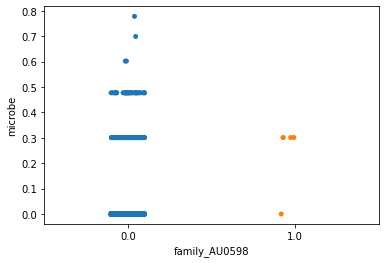

In [304]:
import seaborn as sns
sns.stripplot(y=endog['microbe'], x=exog['family_AU0598'])

In [214]:
endog = np.log10(df_microbe[[column]]+1)
endog.columns = ['microbe']
formula='microbe ~ C(bio_seq_source) + C(family)'
data = endog.join(bam_mappings.loc[df_microbe.index])
a = ols(formula,data=data, missing='drop').fit()

In [200]:
data

,microbe,status,participant_id,family,AGRE Blood,NIMH Blood,relationship,FatherID,MotherID,sex_numeric,...,number_of_heterozygous_snvs,het_to_hom_ratio,ti_tv_ratio,dbsnp_overlap,concordance_with_genotyping_chip,cryptic_relatedness_check,family_based_average_coverage,familial_relationship_check,child,autism
sample,,,,,,,,,,,,,,,,,,,,,
02C10540,0.0,Passed_QC_analysis_ready,AU1005201,AU1005,HI2393,02C10540,father,0,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
02C10541,0.0,Passed_QC_analysis_ready,AU1005202,AU1005,HI2394,02C10541,mother,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
02C10542,0.0,Passed_QC_analysis_ready,AU1005302,AU1005,HI2395,02C10542,sibling,AU1005201,AU1005202,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
02C10543,0.0,Passed_QC_analysis_ready,AU1005301,AU1005,HI2396,02C10543,sibling,AU1005201,AU1005202,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
02C10702,0.0,Passed_QC_analysis_ready,AU1004202,AU1004,HI2397,02C10702,mother,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MH0143008,0.0,Passed_QC_analysis_ready,AU3859201,AU3859,HI11780,MH0143008,father,0,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
MH0143009,0.0,Passed_QC_analysis_ready,AU3859202,AU3859,HI11781,MH0143009,mother,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
MH0143013,0.0,Passed_QC_analysis_ready,AU3859303,AU3859,HI11784,MH0143013,sibling,AU3859201,AU3859202,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [ ]:
inputs = tqdm(df_microbe.columns)
pval_list = Parallel(n_jobs=num_cores)(delayed(ANOVA_Pvals)(i) for i in inputs)
pvals = [cc for c in pval_list for cc in c]

In [167]:
sig_predictors = list(anova_results.index[np.mean(anova_results['PR(>F)']<(1000.05/len(df_microbe)/4))])

['C(sequencing_plate)',
 'C(autism)',
 'C(sex_numeric)',
 'C(family)',
 'C(bio_seq_source)',
 'C(child)']

In [162]:
formula = 'microbe ~ ' + ' + '.join(sig_predictors)
formula

'microbe ~ C(sequencing_plate)'

In [141]:
from sklearn.feature_selection import f_regression

In [142]:
f_regression()

,microbe
sample,
02C10540,0.0
02C10541,0.0
02C10542,0.0
02C10543,0.0
02C10702,0.0
...,...
MH0143008,0.0
MH0143009,0.0
MH0143013,0.0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
bam_mappings.loc[df_microbe.index][['bio_seq_source', 'sequencing_plate', 'sex_numeric', 'child', 'autism', 'family']]

[('Human herpesvirus 4', 'C(bio_seq_source)', 0.0), ('Saccharomyces cerevisiae killer', 'C(bio_seq_source)', 0.0), ('Hepatitis C virus.1', 'C(bio_seq_source)', 2.322449991950955e-32), ('Enterobacteria phage phiX174', 'C(bio_seq_source)', 6.130775605876699e-29), ('Torque teno virus.3', 'C(bio_seq_source)', 2.2321576059602236e-21), ('Cyprinid herpesvirus 3', 'C(bio_seq_source)', 6.272115717402026e-18), ('Torque teno virus.7', 'C(bio_seq_source)', 1.0540903033000278e-11), ('Torque teno mini.2', 'C(bio_seq_source)', 1.290250602005863e-11), ('Torque teno virus.8', 'C(bio_seq_source)', 6.845616044205761e-09), ('Torque teno virus.2', 'C(bio_seq_source)', 1.0084957424578058e-08)]


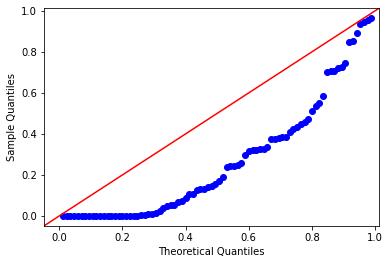

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


0.0


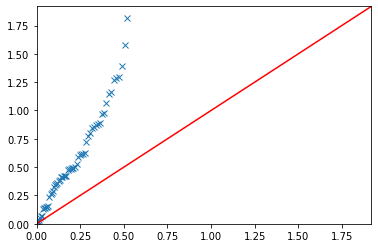

In [139]:
p_select = [p for p in pvals if 'bio_seq_source' in p[1]]
print(sorted(p_select, key=lambda x: x[2])[:10])
p_select = [p[2] for p in p_select]
sm.qqplot(np.array(p_select), dist='uniform', line='45')
plt.show()
exp = -np.log10(np.linspace(0,1,len(p_select)))
plt.plot(exp, -np.log10(sorted(p_select)), 'x')
plt.plot(exp, exp, 'r-')
plt.xlim(min(exp[1:]), max(exp[1:]))
plt.ylim(min(exp[1:]), max(exp[1:]))
#plt.xscale('log')
#plt.yscale('log')
print(min(p_select)*len(df_microbe)/5)

In [906]:
all_columns = ['sex_numeric', 'bio_seq_source', 'sequencing_plate', 'relationship', 'derived_affected_status']
for drop_col in all_columns:
    print(drop_col)
    reduced_cols = [c for c in all_columns if c!=drop_col]
    all_cols = reduced_cols + [drop_col]
    
    # All Model
    exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][all_cols], drop_first=True, dummy_na=True).astype(float)
    exog = exog[exog.columns[exog.sum()!=0]]
    exog = sm.add_constant(exog)
    mod = sm.OLS(endog, exog, hasconst=True)
    res_all = mod.fit()

    # reduced
    exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][reduced_cols], drop_first=True, dummy_na=True).astype(float)
    exog = exog[exog.columns[exog.sum()!=0]]
    exog = sm.add_constant(exog)
    mod1 = sm.OLS(endog, exog, hasconst=True)
    res_reduced = mod1.fit()
    
    anova_results = anova_lm(res_reduced, res_all)
    print(COLUMN, anova_results['Pr(>F)'][1], drop_col)

sex_numeric
Torque teno virus.7 0.5552934398734666 sex_numeric
bio_seq_source
Torque teno virus.7 0.5333142472377376 bio_seq_source
sequencing_plate
Torque teno virus.7 1.1133038329626608e-07 sequencing_plate
relationship
Torque teno virus.7 0.5229576759334147 relationship
derived_affected_status
Torque teno virus.7 0.9683936803421695 derived_affected_status


In [898]:
exog

,sex_numeric_2.0,bio_seq_source_WB,sequencing_plate_MTR-00010,sequencing_plate_MTR-00011,sequencing_plate_MTR-00012,sequencing_plate_MTR-00013,sequencing_plate_MTR-00014,sequencing_plate_MTR-00015,sequencing_plate_MTR-00016,sequencing_plate_MTR-00017,...,sequencing_plate_MTR-01020,sequencing_plate_MTR-01021,sequencing_plate_MTR-01022,sequencing_plate_MTR-01024,sequencing_plate_MTR-01025,sequencing_plate_MTR-01372,sequencing_plate_MTR-01378,sequencing_plate_MTR-01379,relationship_mother,relationship_sibling
sample,,,,,,,,,,,,,,,,,,,,,
02C10540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02C10541,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
02C10542,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
02C10543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
02C10702,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MH0143008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MH0143009,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
MH0143013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


(-0.0, 1.919078092376074)

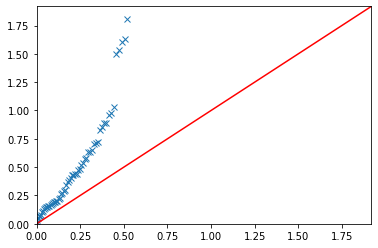

In [814]:
exp = -np.log10(np.linspace(0,1,len(pvals)))
plt.plot(exp, -np.log10(sorted([p[2] for p in pvals])), 'x')
plt.plot(exp, exp, 'r-')
plt.xlim(min(exp[1:]), max(exp[1:]))
plt.ylim(min(exp[1:]), max(exp[1:]))
#plt.xscale('log')
#plt.yscale('log')

(0.0, 5.0)

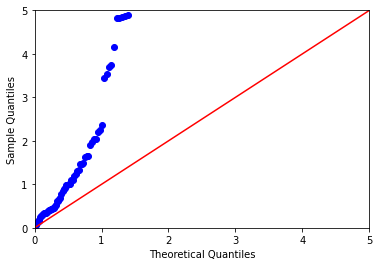

In [815]:
sm.qqplot(np.array(-np.log(sorted([p[2] for p in pvals]))), dist=stats.expon, line='45')
plt.xlim(0,5)
plt.ylim(0,5)

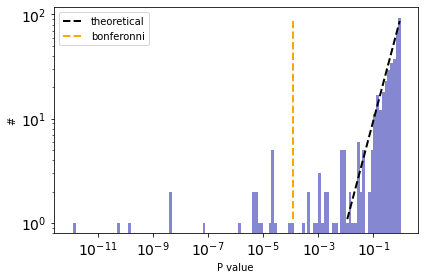

In [797]:
PlotPvals(np.array([p[2] for p in pvals]))

In [92]:
sm.qqplot(-np.log10(np.array([p[2] for p in pvals])), dist=stats.loggamma)

TypeError: %s requires more parameters to compute ppf

In [223]:
fam_cutoff = .05/len(np.unique(bam_mappings.loc[df_microbe.index].family))/len(pvals_dict)
seq_plate_cutoff = .05/len(np.unique(bam_mappings.loc[df_microbe.index].sequencing_plate))/len(pvals_dict)
other_cutoff = .05/len(pvals_dict)

In [215]:
import statsmodels.api as sm
exog_new = sm.add_constant(exog)
mod = sm.OLS(endog, exog_new, hasconst=True)
res = mod.fit()

In [217]:
[(i,j) for i,j in zip(exog.columns[np.argsort(res.pvalues[1:])], sorted(res.pvalues[1:]))][:60]

[('family_AU1245', 9.533004416565341e-10),
 ('family_AU1795', 1.0346611807110084e-08),
 ('family_AU2204', 2.954969485332945e-08),
 ('family_AU3907', 1.3800440809741099e-06),
 ('family_AU0025', 6.264403395028167e-06),
 ('family_AU2997', 1.4309065714134361e-05),
 ('sequencing_plate_MTR-01379', 3.556918559876469e-05),
 ('family_AU3126', 0.0009690506211639752),
 ('family_AU3792', 0.0011994838582216596),
 ('family_AU0889', 0.0031070534903114887),
 ('family_AU1766', 0.00545094987626212),
 ('family_AU2313', 0.011948426762190953),
 ('family_AU1616', 0.016739074906737022),
 ('family_AU0043', 0.019987350801427297),
 ('family_AU0651', 0.020994087355327373),
 ('family_AU1173', 0.02498741639503736),
 ('family_AU0994', 0.025422408485803794),
 ('family_AU1686', 0.026945123148944282),
 ('family_AU4105', 0.04511450007917053),
 ('sequencing_plate_MTR-01009', 0.0476559937434753),
 ('family_AU1638', 0.04779390927162295),
 ('family_AU1631', 0.04779390927162295),
 ('family_AU1655', 0.04781775444491799),
 ('

<AxesSubplot:xlabel='sequencing_plate', ylabel='Acetobacter pasteurianus IFO'>

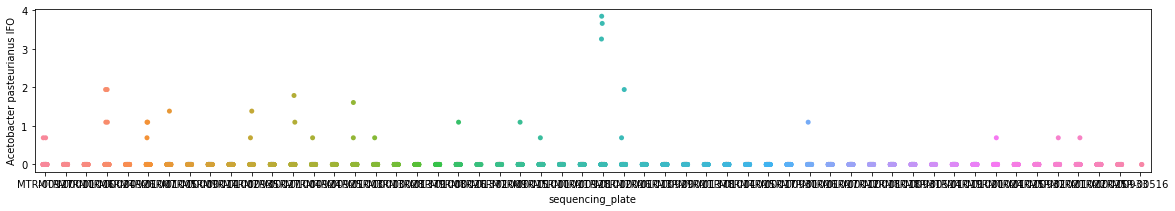

In [58]:
plt.figure(figsize=(20,3))
sns.stripplot(y=endog, x=bam_mappings['sequencing_plate'])

In [624]:
# Write to exog directory if not written (should be written after first run)
# Write to exog directory if not written (should be written after first run)
exog = pd.get_dummies(bam_mappings.loc[df_microbe.index][['sequencing_plate', 'bio_seq_source', 'sex_numeric', 'derived_affected_status', 'relationship']], drop_first=False).astype(float)
exog['derived_affected_status_autism'] = exog['derived_affected_status_autism'] + exog['derived_affected_status_asd']
exog = exog.drop(
    ['derived_affected_status_broad-spectrum', 'derived_affected_status_not-met', 'derived_affected_status_nqa', 'derived_affected_status_asd',
     'relationship_mother', 'relationship_father', 'sex_numeric_1.0', 'bio_seq_source_LCL'], axis=1)
exog['derived_affected_status_nt'] = ((exog['relationship_sibling']==1) & (exog['derived_affected_status_autism']==0))*1.0

print('Cross-validation for alpha...')
np.random.seed(np.cumsum([ord(i) for i in COLUMN])[-1])
endog = np.log(df_microbe[COLUMN]+1)

def ComputeCoefficients(i):
    np.random.seed(i)
    new_idx = np.random.choice(list(range(len(exog))), len(exog), replace=True)#np.concatenate(bam_mappings.loc[exog.index][['sample_id', 'family']].groupby('family').aggregate(lambda x: list(np.random.choice(list(x), len(list(x)), replace=True)))['sample_id'].values)
    exog_new = exog.iloc[new_idx]
    endog_new = endog[new_idx]
    lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)#, alpha=alpha)
    lm.fit(exog_new, endog_new)
    #endog_new = endog - (exog.apply(lambda x: sum(x*lm.coef_), axis=1) + lm.intercept_)
    #endog_new = endog_new - np.mean(endog_new)
    #df = pd.DataFrame([bam_mappings.loc[endog_new.keys()]['family'], endog_new]).transpose()
    #df.columns = ['family', 'val']
    #df = df.sort_values('family')
    fam_coefs = list(df.groupby('family').aggregate(lambda x: np.mean(list(x)))['val'].values)
    return lm.coef_

print('running bootstrap')
inputs = tqdm([i for i in range(N_BOOTS)])
coeffs = Parallel(n_jobs=num_cores)(delayed(ComputeCoefficients)(i) for i in inputs)
print('Computing p values...')

pvals_coeffs = [sum([c[i]>0 for c in coeffs])/N_BOOTS  for i in range(len(exog.columns))]
#pvals_fams = [sum([c[i]>0 for c in coeffs])/N_BOOTS  for i in range(len(exog.columns), len(coeffs[0]))]#len(coeffs[0][len(exog.columns):]))]



  0%|          | 0/20 [00:00<?, ?it/s]

Cross-validation for alpha...
running bootstrap



100%|██████████| 20/20 [00:03<00:00,  6.51it/s]


Computing p values...


In [ ]:
fams = np.unique(bam_mappings.family)
for microbe in df_microbe.columns[100:]:
    endog = df_microbe[microbe].values
    lm = linear_model.LinearRegression(fit_intercept=True)
    lm.fit(exog, endog)
    endog_new = endog - (exog.apply(lambda x: sum(x*lm.coef_), axis=1) + lm.intercept_)
    endog_new = endog_new - np.mean(endog_new)
    df = pd.DataFrame([bam_mappings.loc[endog_new.keys()]['family'], endog_new]).transpose()
    df.columns = ['family', 'val']
    #mannu_whitney_pval = [(stats.mannwhitneyu(df[df.family==f].val, df[df.family!=f].val, alternative='greater').pvalue) for f in fams]
    print(microbe)
    print(stats.kruskal(*[i for i in df.groupby('family').aggregate(list).val]))
    print(stats.)
    print(microbe, [m for m in mannu_whitney_pval if m<(.05/(len(df_microbe.columns)*len(mannu_whitney_pval)))], min(mannu_whitney_pval))
#df = df.sort_values('family')
#fam_coefs = list(df.groupby('family').aggregate(lambda x: np.mean(list(x)))['val'].values)

In [672]:
import scikit_posthocs as sp

In [ ]:
sp.posthoc_conover([i for i in df.groupby('family').aggregate(list).val])

In [ ]:
df_microbe[['Borrelia duttonii Ly']].sort_values('Borrelia duttonii Ly')[::-1][:10]

In [ ]:
[i for i in df.groupby('family').aggregate(list).val]

In [649]:
.05/(len(df_microbe.columns)*len(mannu_whitney_pval))

8.46952326747432e-08

In [ ]:
bam_mappings['se']

In [638]:
pvals_coeffs_df = pd.DataFrame(pvals_coeffs)
pvals_coeffs_df.index = exog.columns
pvals_coeffs_df.columns = ['p']
pvals_coeffs_df.sort_values('p')[::-1][:5]

,p
bio_seq_source_WB,1.00
derived_affected_status_nt,0.95
derived_affected_status_autism,0.95
sequencing_plate_MTR-00516,0.50
sequencing_plate_MTR-00027,0.45


In [4]:
virus_pvals = pd.read_csv(virus_pvals_file, index_col=0)
bacteria_pvals = pd.read_csv(bacteria_pvals_file, index_col=0)

In [ ]:
bacteria_pvals

(array([139.,  15.,   8.,  14.,  15.,  14.,  18.,  29.,  37., 299.]),
 array([-4.00000000e+00, -3.59999566e+00, -3.19999131e+00, -2.79998697e+00,
        -2.39998263e+00, -1.99997829e+00, -1.59997394e+00, -1.19996960e+00,
        -7.99965258e-01, -3.99960915e-01,  4.34272769e-05]),
 <BarContainer object of 10 artists>)

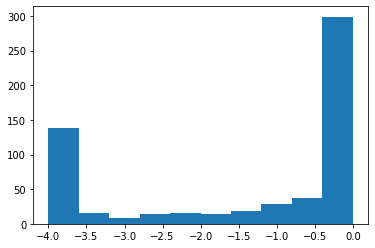

In [37]:
plt.hist(np.log10(bacteria_pvals['sequencing_plate_MTR-00009']+.0001))

In [31]:
## Virus
print('VIRUS')
r, c = np.where(virus_pvals<(.05/(len(virus_pvals))))
hits = [(virus_pvals.index[i],virus_pvals.columns[j]) for i,j in zip(r,c)]
seq_plate_hits = [h for h in hits if 'sequencing_plate' in h[1]]
sex_hits = [h for h in hits if 'sex_numeric' in h[1]]
asd_hits = [h for h in hits if 'derived_affected_status' in h[1]]
bio_source_hits = [h for h in hits if 'bio_seq_source' in h[1]]
relationship_hits = [h for h in hits if 'relationship' in h[1]]
family_hits = [h for h in hits if 'family' in h[1]]
for label, hh in [('seq_plate', seq_plate_hits),
                  ('sex_hits', sex_hits),
                  ('asd_hits', asd_hits),
                  ('bio_source_hits', bio_source_hits),
                  ('relationship_hits', relationship_hits),
                  ('family_hits', family_hits)]:
    print(label, len(Counter([h[0] for h in hh])), len(hh)) #,len(hh), len(set([h[0] for h in hh])))

VIRUS
seq_plate 19 399
sex_hits 1 1
asd_hits 1 1
bio_source_hits 4 4
relationship_hits 2 2
family_hits 1 2


In [30]:
family_hits

[('Enterobacteria phage phiX174', 'family_AU1905'),
 ('Enterobacteria phage phiX174', 'family_AU1921')]

In [5]:
print("BACTERIA")
r, c = np.where(bacteria_pvals<(.05/(len(virus_pvals)+len(bacteria_pvals))))
hits = [(bacteria_pvals.index[i],bacteria_pvals.columns[j]) for i,j in zip(r,c)]
seq_plate_hits = [h for h in hits if 'sequencing_plate' in h[1]]
sex_hits = [h for h in hits if 'sex_numeric' in h[1]]
asd_hits = [h for h in hits if 'derived_affected_status' in h[1]]
bio_source_hits = [h for h in hits if 'bio_seq_source' in h[1]]
relationship_hits = [h for h in hits if 'relationship' in h[1]]
family_hits = [h for h in hits if 'family' in h[1]]
for label, hh in [('seq_plate', seq_plate_hits),
                  ('sex_hits', sex_hits),
                  ('asd_hits', asd_hits),
                  ('bio_source_hits', bio_source_hits),
                  ('relationship_hits', relationship_hits),
                  ('family_hits', family_hits)]:
    print(label, len(Counter([h[0] for h in hh])), len(hh)) #,len(hh), len(set([h[0] for h in hh])))

BACTERIA
seq_plate 400 4001
sex_hits 3 3
asd_hits 0 0
bio_source_hits 97 97
relationship_hits 0 0
family_hits 1 1


In [11]:
family_hits

[('Plasmodium knowlesi strain', 'family_AU1466')]

In [41]:
import pandas as pd

BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'

BACTERIA_ALL_FILE = BLOOD_MICROBIOME_DIR + 'data/bacteria_filtered.csv'
BACTERIA_UNFINISHED_FILE = BLOOD_MICROBIOME_DIR + 'intermediate_files/lasso/unfinished_bacteria.txt'
VIRUS_ALL_FILE = BLOOD_MICROBIOME_DIR + 'data/virus_filtered.csv'
VIRUS_UNFINISHED_FILE = BLOOD_MICROBIOME_DIR + 'intermediate_files/lasso/unfinished_virus.txt'

bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
df_bacteria = pd.read_csv(BACTERIA_ALL_FILE, index_col=0)
df_virus = pd.read_csv(VIRUS_ALL_FILE, index_col=0)
try: finished_bacteria = pd.read_csv('/home/groups/dpwall/briannac/blood_microbiome/results/lasso/bacteria_pvals.csv', index_col=0).index
except:  finished_bacteria = []
try: finished_virus = pd.read_csv('/home/groups/dpwall/briannac/blood_microbiome/results/lasso/virus_pvals.csv', index_col=0).index
except: finished_virus = []

unfinished_virus = set(df_virus.columns).difference(set(finished_virus))
print(len(unfinished_virus), 'viruses unfinished')

unfinished_bacteria = set(df_bacteria.columns).difference(set(finished_bacteria))
print(len(unfinished_bacteria), 'bacteria unfinished')

with open(VIRUS_UNFINISHED_FILE, 'w') as f:
    for b in unfinished_virus:
        f.write(b + '\n')

with open(BACTERIA_UNFINISHED_FILE, 'w') as f:
    for b in unfinished_bacteria:
        f.write(b + '\n')


84 viruses unfinished
588 bacteria unfinished


In [32]:
BACTERIA_UNFINISHED_FILE

'/home/groups/dpwall/briannac/blood_microbiome/intermediate_files/lasso/bacteria_unfinished.txt'

In [ ]:
100000